Group and sum by metaprogram problem solved with: https://stackoverflow.com/questions/39650749/group-by-sparse-matrix-in-scipy-and-return-a-matrix

## All programs

#### Load modules

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

import scanpy as sc
import squidpy as sq

import scipy

from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
directory = '/n/scratch/users/s/sad167/EPN/Xenium/analysis/neighborhood/all_programs'
if not os.path.exists(directory):
    os.makedirs(directory)

#### Concatenating all samples

In [3]:
# sample BT1717 was excluded because it was creating problems during metaprogram annotation, and it has extremely high number of cells that confounds the results
samples = ['BT2126', '7EP41', '3EP8', '7EP1',
                     'BT775', 
         #  'BT1717', 
           'BT2169', 'BT1804',
                     '11EP22',  'BT1743']

path = ['/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231020__200939__BT2126_BT1745/output-XETG00083__0010652__Region_4__20231020__201259',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_1__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_2__20231102__215155',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_3__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_1__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_2__20231102__215155',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_3__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_4__20231102__215155',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_5__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231107__203958__BT1717_BT775/0010501-Region_1',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231107__203958__BT1717_BT775/0010501-Region_2',
      #  '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231107__203958__BT1717_BT775/0010814-Region_2',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231109__203408__BT1804_BT2169/output-XETG00083__0010498__Region_1__20231109__203421',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231109__203408__BT1804_BT2169/output-XETG00083__0010775__Region_1__20231109__203421',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_1__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_2__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_3__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_4__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_1__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_2__20231208__193752',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_3__20231208__193752', 
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_4__20231208__193752'
       ]

metadata = ['/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231020__200939__BT2126_BT1745/data/individual/cell_ID_0010652-Region_4.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010575-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010575-Region_2.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010575-Region_3.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_2.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_3.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_4.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_5.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231107__203958__BT1717_BT775/data/individual/cell_ID_0010501-Region_1.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231107__203958__BT1717_BT775/data/individual/cell_ID_0010501-Region_2.csv',
        # '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231107__203958__BT1717_BT775/data/individual/cell_ID_0010814-Region_2.csv',

            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231109__203408__BT1804_BT2169/data/individual/cell_ID_0010498-Region_1.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231109__203408__BT1804_BT2169/data/individual/cell_ID_0010775-Region_1.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_2.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_3.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_4.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_2.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_3.csv', 
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_4.csv'
           ]


anndata_list = []
for i in range(len(samples)):
    adata = sc.read_10x_h5(filename = path[i]+'/cell_feature_matrix.h5')
    df = pd.read_csv(path[i]+'/cells.csv.gz')
    
    df.set_index(adata.obs_names, inplace=True)
    adata.obs = df.copy()
    
    #adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
    adata.obsm["spatial"] = np.array([adata.obs.x_centroid*0.325, adata.obs.y_centroid*0.325]).transpose().astype('float64')
    
    anno = pd.read_csv(metadata[i], index_col = 0)
    if 'X' in anno.columns:
        anno.index = anno['X']
    
    adata = adata[anno.index,:]
    
    adata.obs['Metaprogram'] = anno['group']
    adata.obs['Metaprogram'] = adata.obs['Metaprogram'].astype('category')
    adata.obs['sample'] = samples[i]
    
    anndata_list.append(adata)
    
    print(samples[i])

adata = sc.concat(anndata_list)    

BT2126
7EP41
3EP8
7EP1
BT775
BT2169
BT1804
11EP22
BT1743


In [4]:
# Subset to remove "Unassigned" program and oligodendrocytes (too little cell number)
adata = adata[~adata.obs['Metaprogram'].isin(['Unassigned', 'Oligodendrocytes'])]

# Create a color palette for each unique Metaprogram
metaprogram_names = ["Cycling", "Neuroepithelial-like", "Radial glia-like", 
                          "NPC-like" ,"Ependymal-like", "Mesenchymal", "Unassigned", 
                          "T-cell", "Myeloid", "Microglia", "Endothelial", "Neurons", "VLMCs", "Oligodendrocytes"]

metaprogram_colors = ["gray30","#F99E93FF","#9E5E9BFF","#74ADD1FF","#ACD39EFF","#96410EFF", 'black',
                   '#BDA14DFF', '#3EBCB6FF', '#0169C4FF', '#153460FF', '#D5114EFF' ,'#A56EB6FF' ,'#4B1C57FF']

metaprogram_to_color = dict(zip(metaprogram_names, metaprogram_colors))

#### Plotting spatial neighbors for each sample

BT2126


<Figure size 5000x5000 with 0 Axes>

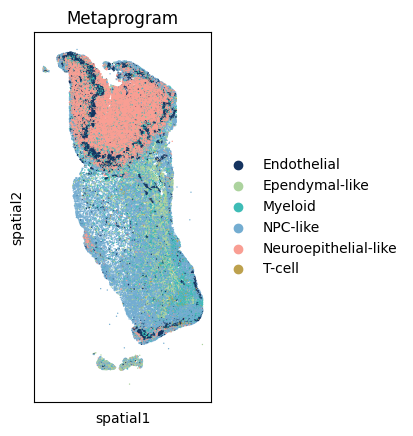

7EP41


<Figure size 5000x5000 with 0 Axes>

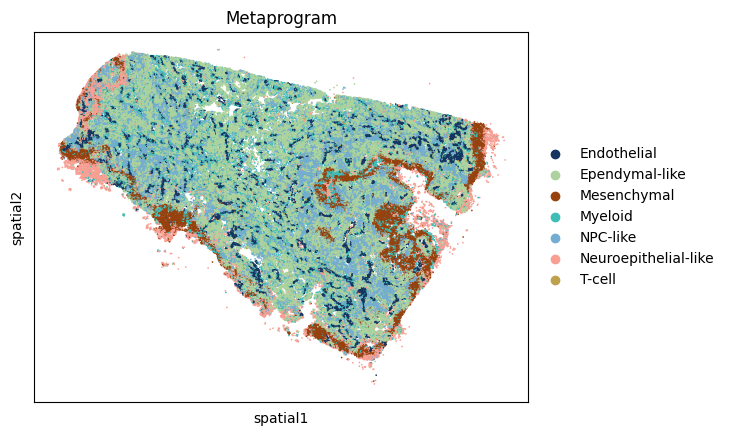

3EP8


<Figure size 5000x5000 with 0 Axes>

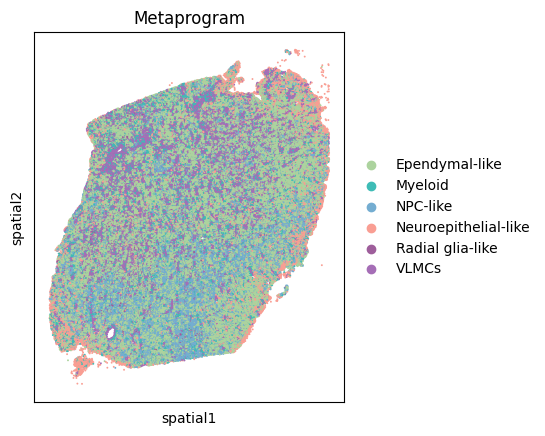

7EP1


<Figure size 5000x5000 with 0 Axes>

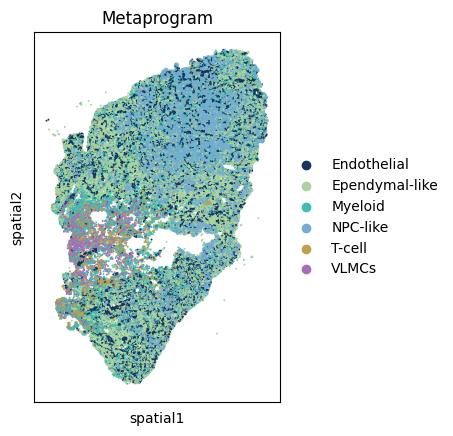

BT775


<Figure size 5000x5000 with 0 Axes>

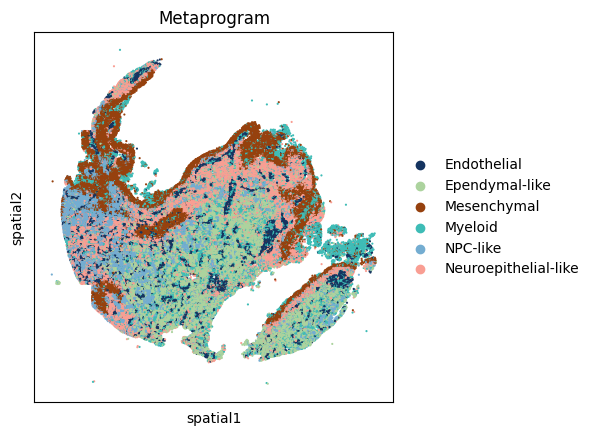

BT2169


<Figure size 5000x5000 with 0 Axes>

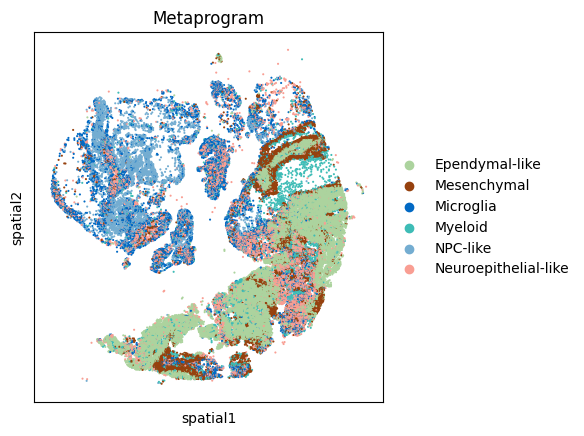

BT1804


<Figure size 5000x5000 with 0 Axes>

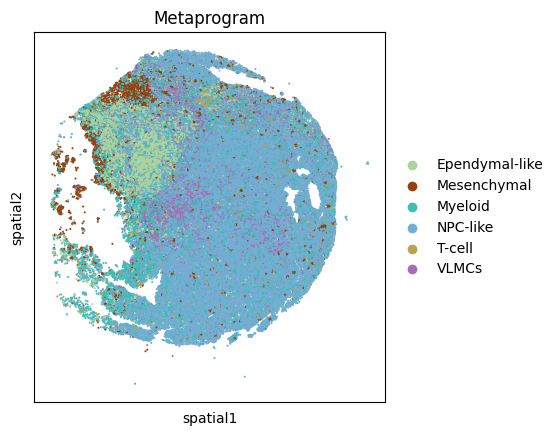

11EP22


<Figure size 5000x5000 with 0 Axes>

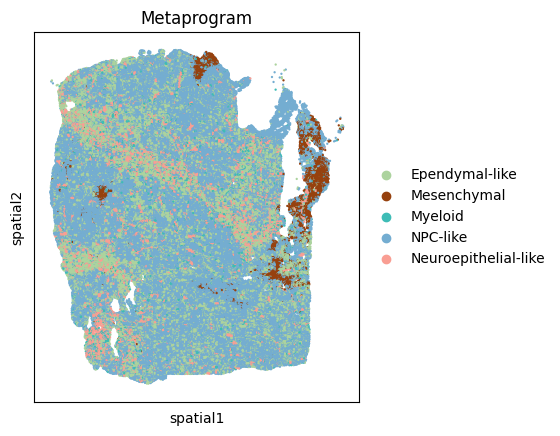

BT1743


<Figure size 5000x5000 with 0 Axes>

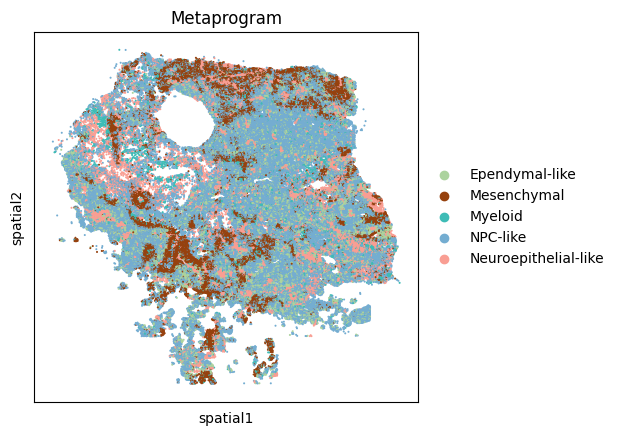

In [5]:
for samp in adata.obs['sample'].unique():
    asub=adata[adata.obs['sample']==samp]
    print(samp)
    plt.figure(figsize=(50,50))
    sc.pl.spatial(
    asub,
    color="Metaprogram",
    palette = metaprogram_to_color,
    neighbors_key="spatial_neighbors",
    spot_size=10,
    edges=False,
    edges_width=2,
    img_key=None,
    )

#Merge all figures for the paper

In [6]:
np.unique(adata.obs['Metaprogram'])

array(['Endothelial', 'Ependymal-like', 'Mesenchymal', 'Microglia',
       'Myeloid', 'NPC-like', 'Neuroepithelial-like', 'Radial glia-like',
       'T-cell', 'VLMCs'], dtype=object)

In [7]:
ad = adata

#### Calculates spatial neighbor for each sample and concatenating it

In [8]:
anndata_list = []
for sample in ad.obs['sample'].unique():
    adata_copy_int = ad[ad.obs['sample'] == sample ]
    adata_copy_int.obs.index = list(pd.DataFrame(list((adata_copy_int.obs['sample'])))[0] +'_' +pd.DataFrame(list((adata_copy_int.obs.index)))[0])
    sq.gr.spatial_neighbors(adata_copy_int, coord_type = 'generic', radius = 70.0)
        
    #lb = LabelBinarizer(sparse_output=True)
    #grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram']).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
    #neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
    #neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis="columns", inplace=True)
    
    #datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
    #datf['key'] = list(adata_copy_int.obs['Metaprogram'])
    #neighmatrix = datf.groupby('key').sum().transpose()
    
    if len(adata_copy_int.obs.groupby('Metaprogram').size()) == 2:
        datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
        datf['key'] = list(adata_copy_int.obs['Metaprogram'])
        neighmatrix = datf.groupby('key').sum().transpose()
    else:
        lb = LabelBinarizer(sparse_output=True)
        grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram'].to_numpy()).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
        neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
        neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis = "columns", copy = False)
    
    adataneigh = sc.AnnData(neighmatrix)
    adataneigh.obs = adata_copy_int.obs
    adataneigh.obs['counts'] = list(np.sum(neighmatrix,axis=1))
    anndata_list.append(adataneigh)
    print(sample)

BT2126
7EP41
3EP8
7EP1
BT775
BT2169
BT1804
11EP22
BT1743


In [9]:
ad_sp_concat = sc.concat(anndata_list, pairwise = True, join = 'outer')

In [10]:
adataneigh = ad_sp_concat
adataneigh.obsm["spatial"] = np.array([adataneigh.obs.x_centroid*0.325, adataneigh.obs.y_centroid*0.325]).transpose().astype('float64')
adataneigh.X = np.nan_to_num(adataneigh.X)

In [11]:
adataneigh = adataneigh[adataneigh.obs['counts'] > 6]

In [12]:
adataneigh.raw = adataneigh

#### Save h5ad file with results

In [13]:
adataneigh.write(directory+'/merged.h5ad')

In [14]:
#sc.pp.neighbors(adataneigh, n_neighbors=8)
#sc.tl.leiden(adataneigh,resolution=0.3,key_added='clusters')
#sc.tl.umap(adataneigh, min_dist = 0.1)

In [15]:
#sc.pl.umap(adataneigh,color=['sample'],palette='Spectral')

#### Compute centrality scores

In [16]:
sq.gr.spatial_neighbors(adataneigh, coord_type = "generic", delaunay = True)

In [17]:
sq.gr.centrality_scores(adataneigh, cluster_key = "Metaprogram")

ERROR: Unable to fetch palette, reason: 'Metaprogram_colors'. Using `None`.


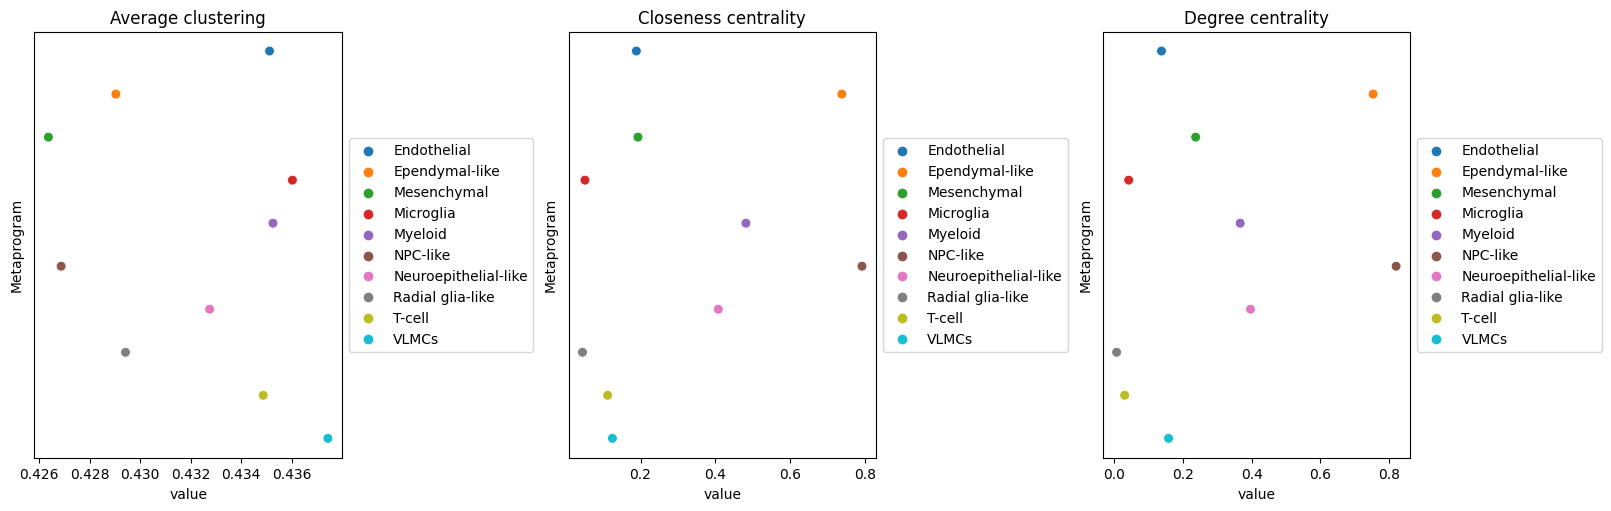

In [20]:
sq.pl.centrality_scores(adataneigh, cluster_key = "Metaprogram", s = 50,
                        figsize = (16, 5))

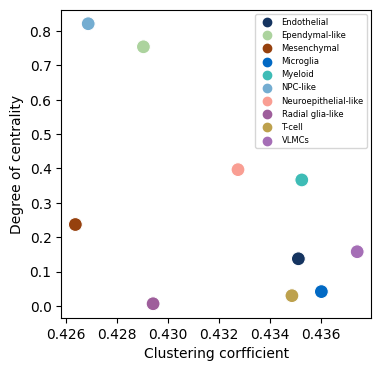

In [21]:
dt = adataneigh.uns['Metaprogram_centrality_scores']
dt['Metaprogram'] = dt.index

plt.figure(figsize=(4, 4))
pt = sns.scatterplot(data=dt, x="average_clustering", y="degree_centrality", hue="Metaprogram", 
                     palette=metaprogram_to_color, legend = True, s = 100)
pt.set(xlabel = 'Clustering corfficient', ylabel = 'Degree of centrality')
pt.legend(fontsize = 6)
plt.savefig(directory+f"/3_centrality_scores.pdf")
plt.show()

In [22]:
df = adataneigh.uns['Metaprogram_centrality_scores']
df.to_csv(directory+'/centrality_scores.csv')

#### Neighbors enrichment analysis

In [23]:
sq.gr.nhood_enrichment(adataneigh, cluster_key = "Metaprogram", seed = 1234)

  0%|          | 0/1000 [00:00<?, ?/s]

<Figure size 1000x400 with 0 Axes>

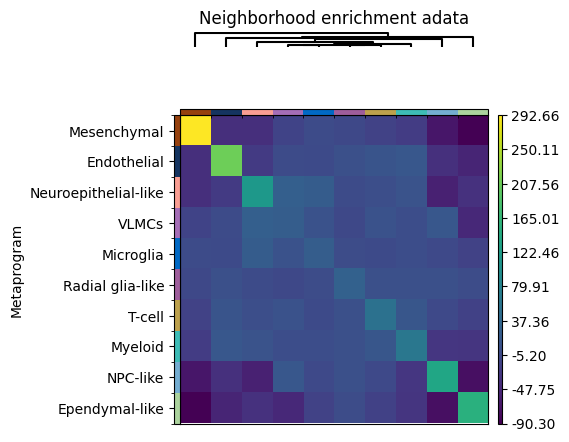

In [25]:
plt.figure(figsize=(10, 4))
sq.pl.nhood_enrichment(
    adataneigh,
    cluster_key = "Metaprogram",
   method = "average",
    figsize = (10, 4),
    palette = metaprogram_to_color,
    title = "Neighborhood enrichment adata"
)
plt.savefig(directory+f"/4_Neighborhood_enrichment.png", dpi=800)

In [ ]:
df_zscore = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['zscore'])
df_counts = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['count'])

df_zscore.to_csv(directory+'/nhood_enrichment_zscore.csv')
df_counts.to_csv(directory+'/nhood_enrichment_counts.csv')

#### Dotplot for fusions per metaprogram

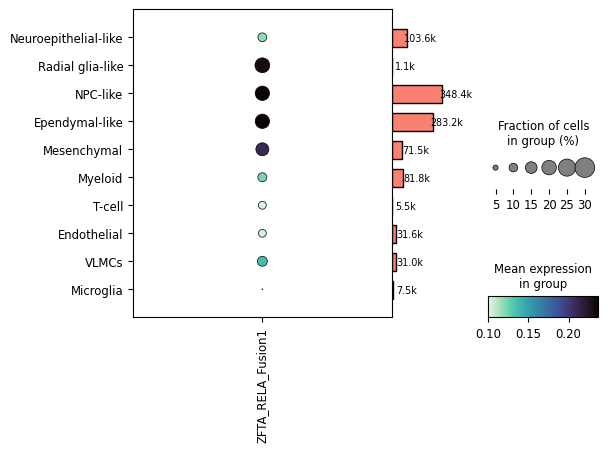

In [27]:
markers = ['ZFTA_RELA_Fusion1']

order_programs = ['Neuroepithelial-like', 'Radial glia-like', 'NPC-like',  'Ependymal-like', 'Mesenchymal',
       'Myeloid', 'T-cell',  'Endothelial', 'VLMCs','Microglia']

# color scale
cmap_reversed = plt.get_cmap('mako').reversed()

dp = sc.pl.dotplot(adata, markers, 'Metaprogram', 
                   figsize = (6, 4), 
                   categories_order=order_programs,
                   vmin = 0.1,
                   return_fig = True)
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5, cmap=cmap_reversed)
dp.savefig(directory+"/dotplot_fusions.pdf")

## Malignant programs only

#### Load modules

In [25]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

import scanpy as sc
import squidpy as sq

import scipy

from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings("ignore")

In [26]:
directory = '/n/scratch/users/s/sad167/EPN/Xenium/analysis/neighborhood/malignant_programs'
if not os.path.exists(directory):
    os.makedirs(directory)

In [27]:
samples = ['BT2126', '7EP41', '3EP8', '7EP1',
                     'BT775', 
          # 'BT1717',
           'BT2169', 'BT1804',
                     '11EP22',  'BT1743']

path = ['/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231020__200939__BT2126_BT1745/output-XETG00083__0010652__Region_4__20231020__201259',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_1__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_2__20231102__215155',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010575__Region_3__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_1__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_2__20231102__215155',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_3__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_4__20231102__215155',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231102__215055__7EP1_7EP41_3EP8/output-XETG00083__0010619__Region_5__20231102__215155',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231107__203958__BT1717_BT775/0010501-Region_1',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231107__203958__BT1717_BT775/0010501-Region_2',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231107__203958__BT1717_BT775/0010814-Region_2',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231109__203408__BT1804_BT2169/output-XETG00083__0010498__Region_1__20231109__203421',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231109__203408__BT1804_BT2169/output-XETG00083__0010775__Region_1__20231109__203421',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_1__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_2__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_3__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010540__Region_4__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_1__20231208__193752',
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_2__20231208__193752',
        '/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_3__20231208__193752', 
        #'/n/scratch/users/s/sad167/EPN/Xenium/data/raw_data/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/output-XETG00083__0010553__Region_4__20231208__193752'
       ]

metadata = ['/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231020__200939__BT2126_BT1745/data/individual/cell_ID_0010652-Region_4.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010575-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010575-Region_2.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010575-Region_3.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_2.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_3.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_4.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231102__215055__7EP1_7EP41_3EP8/data/individual/cell_ID_0010619-Region_5.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231107__203958__BT1717_BT775/data/individual/cell_ID_0010501-Region_1.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231107__203958__BT1717_BT775/data/individual/cell_ID_0010501-Region_2.csv',
        # '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231107__203958__BT1717_BT775/data/individual/cell_ID_0010814-Region_2.csv',

            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231109__203408__BT1804_BT2169/data/individual/cell_ID_0010498-Region_1.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231109__203408__BT1804_BT2169/data/individual/cell_ID_0010775-Region_1.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_2.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_3.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010540-Region_4.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_1.csv',
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_2.csv',
            '/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_3.csv', 
            #'/n/scratch/users/s/sad167/EPN/Xenium/analysis/20231208__193657__3EP8_BT1743_7EP1_11EP22_7EP41/data/individual/cell_ID_0010553-Region_4.csv'
           ]


anndata_list = []
for i in range(len(samples)):
    adata = sc.read_10x_h5(filename = path[i]+'/cell_feature_matrix.h5')
    df = pd.read_csv(path[i]+'/cells.csv.gz')
    
    df.set_index(adata.obs_names, inplace=True)
    adata.obs = df.copy()
    
    #adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
    adata.obsm["spatial"] = np.array([adata.obs.x_centroid*0.325, adata.obs.y_centroid*0.325]).transpose().astype('float64')
    
    anno = pd.read_csv(metadata[i], index_col = 0)
    if 'X' in anno.columns:
        anno.index = anno['X']
    
    adata = adata[anno.index,:]
    
    adata.obs['Metaprogram'] = anno['group']
    adata.obs['Metaprogram'] = adata.obs['Metaprogram'].astype('category')
    adata.obs['sample'] = samples[i]
    
    anndata_list.append(adata)
    
    print(samples[i])

adata = sc.concat(anndata_list)   

BT2126
7EP41
3EP8
7EP1
BT775
BT2169
BT1804
11EP22
BT1743


#### Subsetting malignant programs only

#### Plotting spatial neighbors for each sample

In [28]:
adata = adata[adata.obs['Metaprogram'].isin(['Radial glia-like', 'Neuroepithelial-like', 'NPC-like', 'Ependymal-like', 'Mesenchymal'])]

BT2126


<Figure size 5000x5000 with 0 Axes>

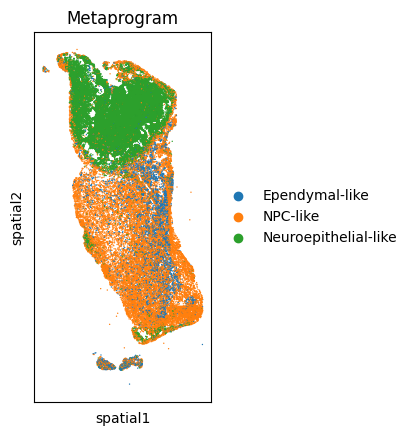

7EP41


<Figure size 5000x5000 with 0 Axes>

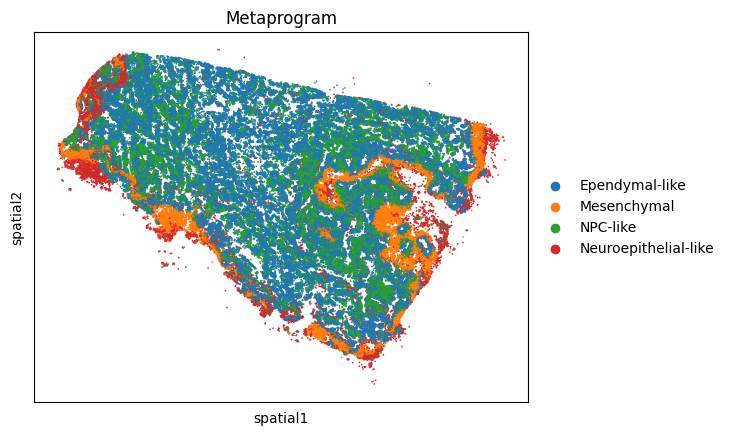

3EP8


<Figure size 5000x5000 with 0 Axes>

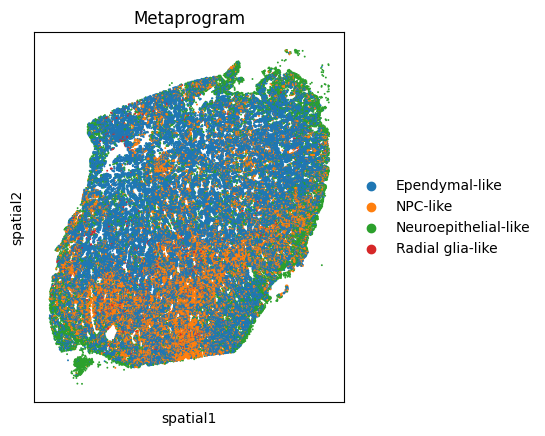

7EP1


<Figure size 5000x5000 with 0 Axes>

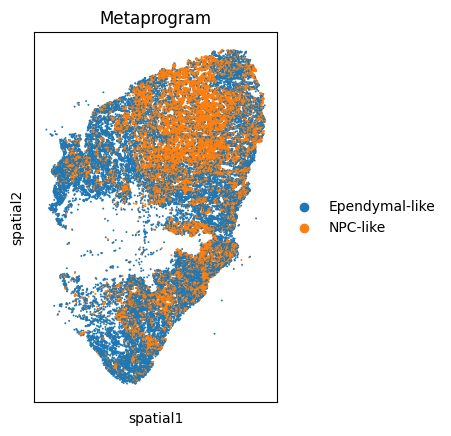

BT775


<Figure size 5000x5000 with 0 Axes>

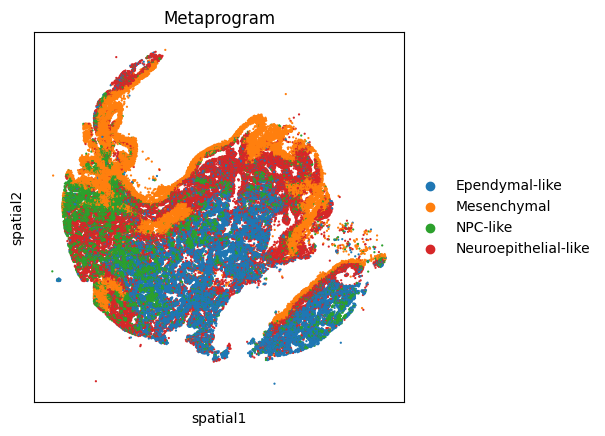

BT2169


<Figure size 5000x5000 with 0 Axes>

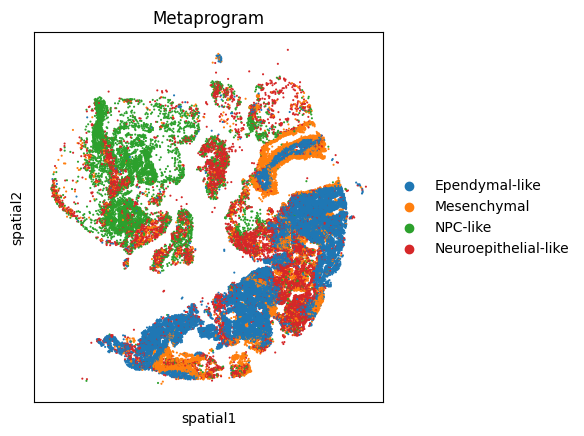

BT1804


<Figure size 5000x5000 with 0 Axes>

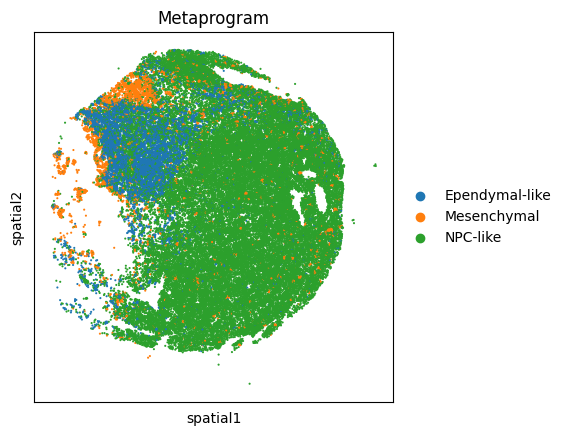

11EP22


<Figure size 5000x5000 with 0 Axes>

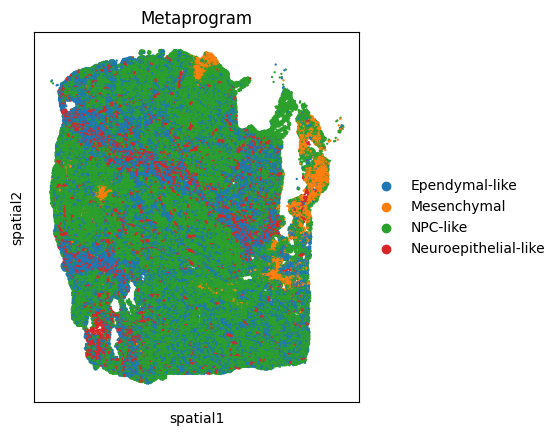

BT1743


<Figure size 5000x5000 with 0 Axes>

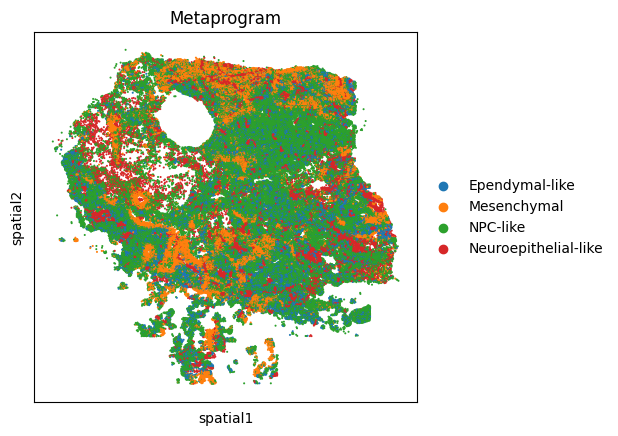

In [29]:
for samp in adata.obs['sample'].unique():
    asub=adata[adata.obs['sample']==samp]
    print(samp)
    plt.figure(figsize=(50,50))
    sc.pl.spatial(
    asub,
    color="Metaprogram",
    neighbors_key="spatial_neighbors",
    spot_size=10,
    edges=False,
    edges_width=2,
    img_key=None,
    )

In [30]:
np.unique(adata.obs['Metaprogram'])

array(['Ependymal-like', 'Mesenchymal', 'NPC-like',
       'Neuroepithelial-like', 'Radial glia-like'], dtype=object)

In [31]:
ad = adata

#### Calculates spatial neighbor for each sample and concatenating it

In [32]:
anndata_list = []
for sample in ad.obs['sample'].unique():
    adata_copy_int = ad[ad.obs['sample'] == sample ]
    adata_copy_int.obs.index = list(pd.DataFrame(list((adata_copy_int.obs['sample'])))[0] +'_' +pd.DataFrame(list((adata_copy_int.obs.index)))[0])
    sq.gr.spatial_neighbors(adata_copy_int, coord_type = 'generic', radius = 70.0)
        
    #lb = LabelBinarizer(sparse_output=True)
    #grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram']).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
    #neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
    #neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis="columns", inplace=True)
    
    #datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
    #datf['key'] = list(adata_copy_int.obs['Metaprogram'])
    #neighmatrix = datf.groupby('key').sum().transpose()
    
    if len(adata_copy_int.obs.groupby('Metaprogram').size()) == 2:
        datf = pd.DataFrame(data = scipy.sparse.csr_matrix.todense((adata_copy_int.obsp['spatial_distances']>0)*1))
        datf['key'] = list(adata_copy_int.obs['Metaprogram'])
        neighmatrix = datf.groupby('key').sum().transpose()
    else:
        lb = LabelBinarizer(sparse_output=True)
        grouped = lb.fit_transform(adata_copy_int.obs['Metaprogram'].to_numpy()).T.dot((adata_copy_int.obsp['spatial_distances']>0)*1)
        neighmatrix = pd.DataFrame(data = scipy.sparse.csr_matrix.todense(grouped)).transpose()
        neighmatrix.set_axis(sorted(adata_copy_int.obs['Metaprogram'].unique()), axis = "columns", copy = False)
    
    adataneigh = sc.AnnData(neighmatrix)
    adataneigh.obs = adata_copy_int.obs
    adataneigh.obs['counts'] = list(np.sum(neighmatrix,axis=1))
    anndata_list.append(adataneigh)
    print(sample)

BT2126
7EP41
3EP8
7EP1
BT775
BT2169
BT1804
11EP22
BT1743


In [33]:
ad_sp_concat = sc.concat(anndata_list, pairwise = True, join = 'outer')

In [34]:
adataneigh = ad_sp_concat
adataneigh.obs['Metaprogram'] = adataneigh.obs['Metaprogram'].astype('category')
adataneigh.obsm["spatial"] = np.array([adataneigh.obs.x_centroid*0.325, adataneigh.obs.y_centroid*0.325]).transpose().astype('float64')
adataneigh.X = np.nan_to_num(adataneigh.X)

In [35]:
adataneigh = adataneigh[adataneigh.obs['counts'] > 6]

In [36]:
adataneigh.raw = adataneigh

#### Save h5ad file with results

In [37]:
adataneigh.write(directory+'/merged.h5ad')

In [38]:
#sc.pp.neighbors(adataneigh, n_neighbors=8)
#sc.tl.leiden(adataneigh,resolution=0.3,key_added='clusters')
#sc.tl.umap(adataneigh, min_dist = 0.1)

In [39]:
#sc.pl.umap(adataneigh,color=['sample'],palette='Spectral')

#### Compute centrality scores

In [40]:
adataneigh = sc.read_h5ad(directory+'/merged.h5ad')

In [41]:
sq.gr.spatial_neighbors(adataneigh, coord_type = "generic", delaunay = True)

In [42]:
sq.gr.centrality_scores(adataneigh, cluster_key = "Metaprogram")

ERROR: Unable to fetch palette, reason: 'Metaprogram_colors'. Using `None`.


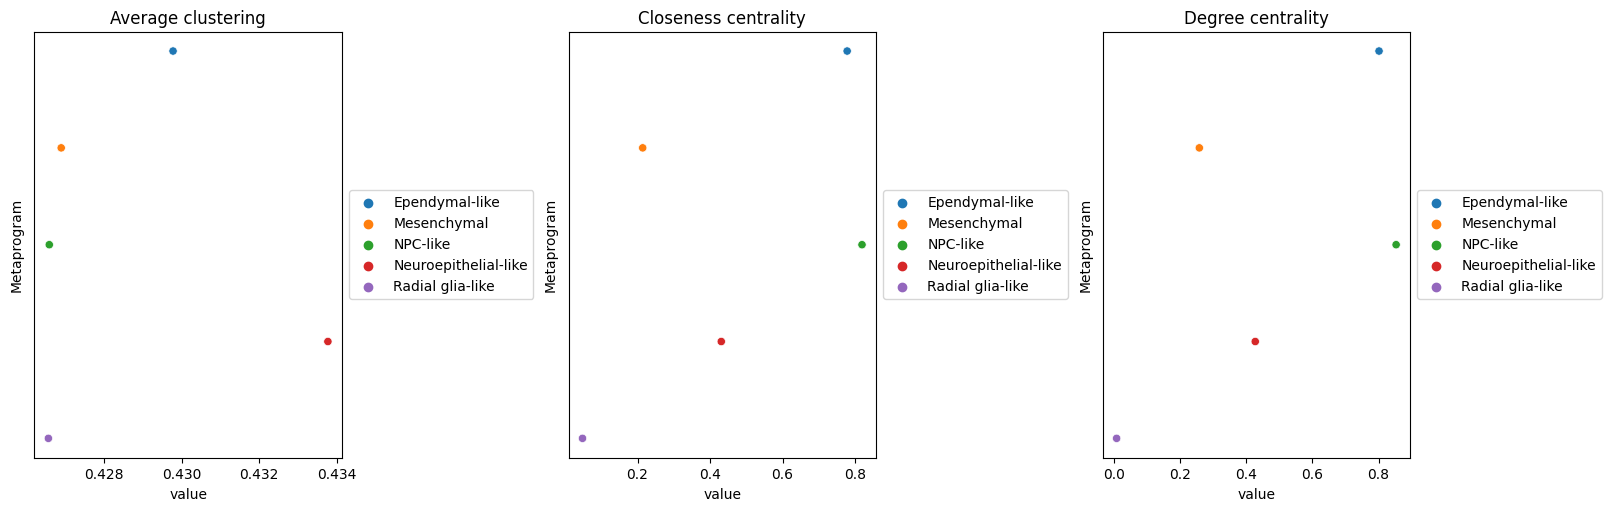

In [43]:
sq.pl.centrality_scores(adataneigh, cluster_key = "Metaprogram", figsize = (16, 5))

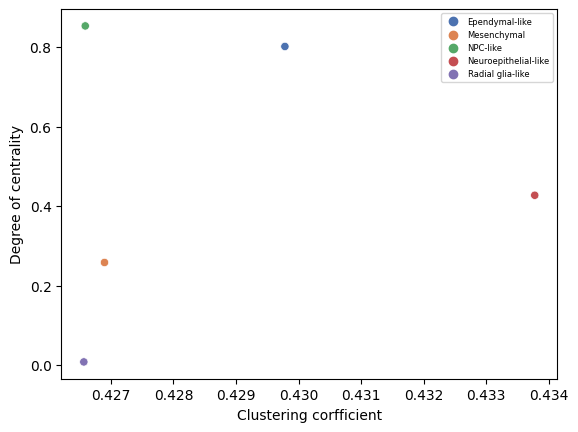

In [44]:
dt = adataneigh.uns['Metaprogram_centrality_scores']
dt['Metaprogram'] = dt.index

pt = sns.scatterplot(data = dt, x = "average_clustering", y = "degree_centrality", hue = "Metaprogram", palette = "deep")
pt.set(xlabel = 'Clustering corfficient', ylabel = 'Degree of centrality')
pt.legend(fontsize = 6)
plt.savefig(directory+"/centrality_scores.pdf")
plt.show()

In [45]:
df = adataneigh.uns['Metaprogram_centrality_scores']
df.to_csv(directory+'/centrality_scores.csv')

#### Neighbors enrichment analysis

In [46]:
sq.gr.nhood_enrichment(adataneigh, cluster_key = "Metaprogram", seed = 1234)

  0%|          | 0/1000 [00:00<?, ?/s]

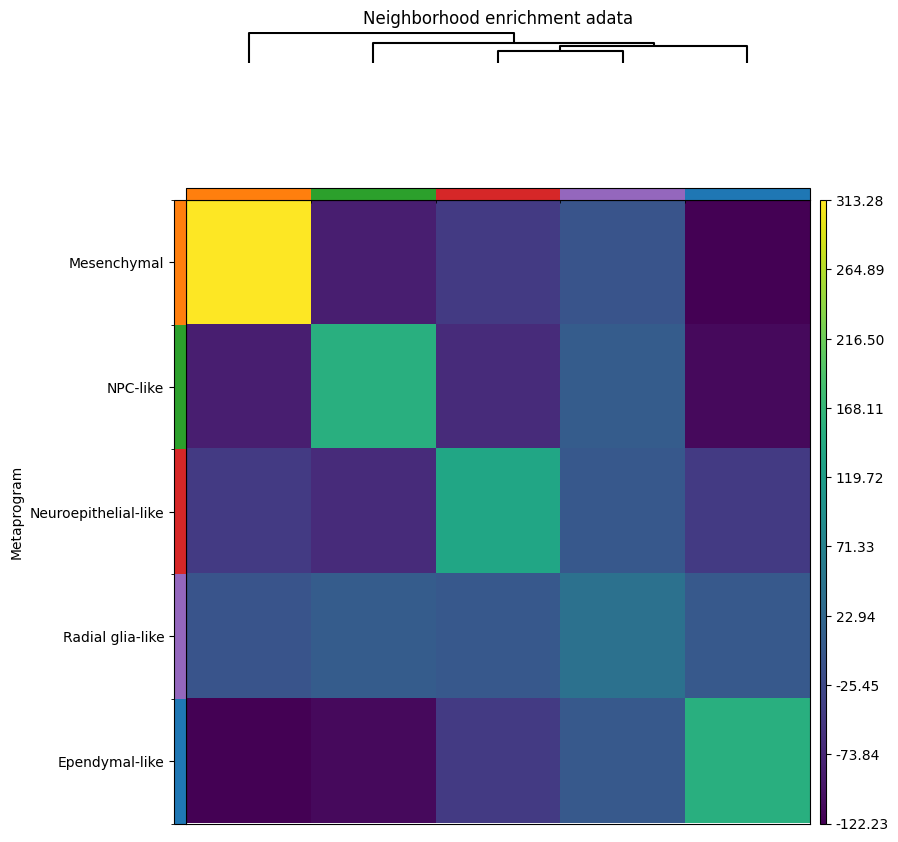

In [47]:
sq.pl.nhood_enrichment(
    adataneigh,
    cluster_key = "Metaprogram",
    method = "average",
    figsize = (8, 8),
    title = "Neighborhood enrichment adata"
)

In [48]:
df_zscore = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['zscore'])
df_counts = pd.DataFrame(adataneigh.uns['Metaprogram_nhood_enrichment']['count'])

df_zscore.to_csv(directory+'/nhood_enrichment_zscore.csv')
df_counts.to_csv(directory+'/nhood_enrichment_counts.csv')

#### Dotplot for fusions per metaprogram

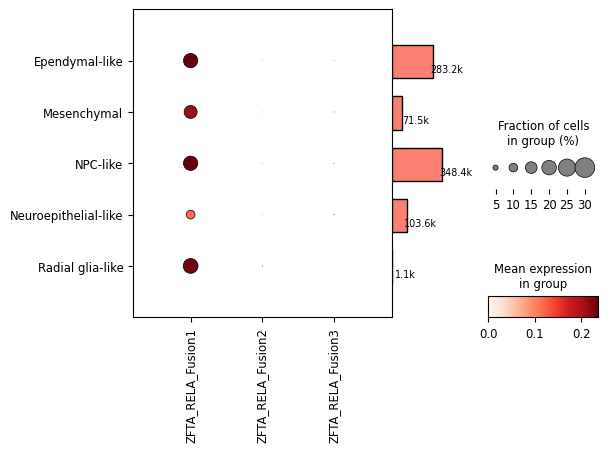

In [49]:
markers = ['ZFTA_RELA_Fusion1', 'ZFTA_RELA_Fusion2', 'ZFTA_RELA_Fusion3']
dp = sc.pl.dotplot(adata, markers, 'Metaprogram', figsize = (6, 4), return_fig = True)
dp.add_totals().style(dot_edge_color = 'black', dot_edge_lw = 0.5, cmap = 'Reds')
dp.savefig(directory+"/dotplot_fusions.pdf")

In [50]:
#genedf = sc.get.obs_df(adata, keys=["Metaprogram", *markers])
#grouped = genedf.groupby("Metaprogram")
#mean = grouped.mean()
#mean.to_csv(directory+'/dotplot_mean.csv')

In [51]:
#plot = sc.pl._baseplot_class.BasePlot(adata, markers, groupby = 'Metaprogram').add_totals()
#pd.DataFrame(plot.plot_group_extra['counts_df']).to_csv(directory+'/dotplot_ncells.csv')

In [52]:
#pd.DataFrame(dp.dot_size_df).to_csv(directory+'/dotplot_size.csv')